## EL CLASSICO GAME ANALYSIS

In this case study, we will go through and understand the passes network between players on both soccer teams FC Barcelona and Real Madrid during a Classico game of the Spanish national league “La Liga”, season 2017/2018.

## Reference

**Dataset provided here:**
https://www.frontiersin.org/articles/10.3389/fpsyg.2018.01900/full

## Context

**Wikipedia:** El Clásico (in Spanish, also in lowercase letters;Spanish pronunciation: [el ˈklasiko]) or El Clàssic is the name given to any football match between rival clubs FC Barcelona and Real Madrid. Originally referring to competitions held in the Spanish championship, the term now includes every match between the clubs, such as those in the UEFA Champions League, Supercopa de España and Copa del Rey. It is considered one of the biggest club football games in the world and is among the most viewed annual sporting events. A fixture known for its intensity, it has featured memorable goal celebrations from both teams, often involving mockery from both sides.

The fixture carries a large-scale political connotation, as Madrid is the capital and largest city of Spain and Barcelona is the capital and largest city of the autonomous community of Catalonia, which has an ongoing independence movement. The two clubs are often identified with opposing political positions, with Real Madrid viewed as representing Spanish nationalism and Barcelona viewed as representing Catalan nationalism. The two clubs are among the wealthiest and most successful football clubs in the world; in 2014 Forbes ranked Barcelona and Real Madrid the world's two most valuable sports teams. Both clubs have a global fanbase; they are the world's two most followed sports teams on social media.

This game features one episode of the Messi-Ronaldo rivalry. The Messi–Ronaldo rivalry, or Ronaldo–Messi rivalry, is a sporting rivalry in football propelled by the media and fans that involves Argentine footballer Lionel Messi and Portuguese footballer Cristiano Ronaldo, mainly for being contemporaries and for their similar records and sporting success.[1] They spent nine seasons in the prime of their careers facing off regularly while playing for rival clubs Barcelona and Real Madrid.

Together they have achieved various historical milestones in the sport, coming to be considered as two of the best players of all time. They are two of the most decorated footballers ever, having won a combined 77 major trophies (Messi 43, Ronaldo 34)[citation needed] during their senior careers thus far, and have regularly broken the 50-goal barrier in a single season. They are the only two players to score over 800 goals each in their careers for club and country. Ronaldo holds the record for most official goals in a career.

## **Import the libraries**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from decorator import decorator
import plotly.express as px
import networkx as nx

from networkx.utils import create_random_state, create_py_random_state
"""Display markdown formatted output like bold, italic bold etc."""


'Display markdown formatted output like bold, italic bold etc.'

In [2]:
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

## Loading the data

In [3]:
data_barca = pd.read_csv('FCBarcelona_tikitaka.csv')
Names = pd.read_csv('player_code_and_name.csv')
data_Real = pd.read_csv('RealMadrid_passes.csv')

In [4]:
data_barca.shape

(15, 15)

In [5]:
pip install --upgrade decorator

Note: you may need to restart the kernel to use updated packages.


In [6]:
Names

NODE NUMBER          PLAYER NAME
0             1        'Luis_Suárez'
1             2    'Sergio_Busquets'
2             3       'Gerard_Piqué'
3             4   'Thomas_Vermaelen'
4             5         'Jordi_Alba'
5             6       'Ivan_Rakitic'
6             7     'Marc-André_ter'
7             8  'Paulinho_Paulinho'
8             9      'Sergi_Roberto'
9            10       'Lionel_Messi'
10           11     'Andrés_Iniesta'
11           12      'Nélson_Semedo'
12           13        'André_Gomes'
13           14        'Aleix_Vidal'
14           15     'Raphael_Varane'
15           16    'Daniel_Carvajal'
16           17  'Casemiro_Casemiro'
17           18       'Keylor_Navas'
18           19       'Sergio_Ramos'
19           20    'Marcelo_Marcelo'
20           21  'Cristiano_Ronaldo'
21           22         'Toni_Kroos'
22           23      'Mateo_Kovacic'
23           24        'Luka_Modric'
24           25      'Karim_Benzema'
25           26        'Nacho_Nacho'
26           27        'Gareth_Bale'
27           28      'Marco_Asensio'

In [7]:
data_barca.head()

NODE NUMBER    1     2    3    4     5     6     7    8     9    10    11  \
0          1.0  0.0   3.0  0.0  1.0   2.0   2.0   0.0  2.0   3.0   7.0   1.0   
1          2.0  4.0   0.0  8.0  9.0   5.0  11.0   2.0  5.0  10.0  10.0   9.0   
2          3.0  4.0   5.0  0.0  6.0   2.0   7.0   3.0  6.0   6.0   3.0   0.0   
3          4.0  1.0   2.0  3.0  0.0  18.0   0.0  10.0  1.0   0.0   0.0   2.0   
4          5.0  5.0  13.0  1.0  7.0   0.0   1.0   2.0  5.0   0.0   7.0  13.0   

    12   13   14  
0  1.0  0.0  0.0  
1  1.0  0.0  0.0  
2  1.0  0.0  2.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0

In [8]:
data_Real.head()

NODE NUMBER  1  2  3  4  5  6  7  8  9  10  11  12  13  14
0            1  0  7  3  3  6  1  0  3  1   2   1   2   1   1
1            2  6  0  5  1  1  1  3  1  7  16   4   0   0   0
2            3  4  5  0  2  5  3  0  5  3   3   1   1   0   0
3            4  3  4  1  0  2  4  0  0  0   3   0   0   0   1
4            5  5  1  2  1  0  9  0  9  1   2   0   1   0   1

In [9]:
pip install --upgrade decorator

Note: you may need to restart the kernel to use updated packages.


In [10]:
#Now let us set the first column as the index for all the dataframes
data_barca.set_index(data_barca.columns[0], inplace=True)
data_Real.set_index(data_Real.columns[0], inplace=True)

In [11]:
data_barca

1     2    3    4     5     6     7    8     9    10    11  \
NODE NUMBER                                                                 
1.0          0.0   3.0  0.0  1.0   2.0   2.0   0.0  2.0   3.0   7.0   1.0   
2.0          4.0   0.0  8.0  9.0   5.0  11.0   2.0  5.0  10.0  10.0   9.0   
3.0          4.0   5.0  0.0  6.0   2.0   7.0   3.0  6.0   6.0   3.0   0.0   
4.0          1.0   2.0  3.0  0.0  18.0   0.0  10.0  1.0   0.0   0.0   2.0   
5.0          5.0  13.0  1.0  7.0   0.0   1.0   2.0  5.0   0.0   7.0  13.0   
6.0          1.0  21.0  8.0  4.0   2.0   0.0   1.0  3.0  10.0   4.0   2.0   
7.0          1.0   4.0  8.0  2.0   4.0   2.0   0.0  6.0   4.0   0.0   1.0   
8.0          3.0   5.0  3.0  0.0   2.0   2.0   0.0  0.0   9.0   7.0   3.0   
9.0          3.0   5.0  8.0  0.0   2.0  14.0   2.0  9.0   0.0   8.0   2.0   
10.0         6.0   5.0  2.0  2.0   1.0   8.0   0.0  8.0   7.0   0.0   5.0   
11.0         2.0   8.0  0.0  3.0  14.0   3.0   0.0  5.0   0.0   6.0   0.0   
12.0         1.0   0.0  0.0  0.0   0.0   1.0   1.0  0.0   3.0   0.0   0.0   
13.0         0.0   0.0  0.0  1.0   1.0   0.0   0.0  0.0   0.0   1.0   0.0   
14.0         0.0   0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   1.0   0.0   
NaN          NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   

              12   13   14  
NODE NUMBER                 
1.0          1.0  0.0  0.0  
2.0          1.0  0.0  0.0  
3.0          1.0  0.0  2.0  
4.0          0.0  0.0  0.0  
5.0          0.0  0.0  0.0  
6.0          1.0  0.0  0.0  
7.0          1.0  1.0  0.0  
8.0          0.0  0.0  0.0  
9.0          2.0  1.0  0.0  
10.0         1.0  3.0  1.0  
11.0         0.0  0.0  0.0  
12.0         0.0  0.0  0.0  
13.0         0.0  0.0  0.0  
14.0         0.0  0.0  0.0  
NaN          NaN  NaN  NaN

In [12]:
data_barca.dropna(inplace=True)
data_Real.dropna(inplace=True)

In [13]:
# Now that we have set the index, check for the consistency in column name and indices data type
data_barca.index, data_barca.columns

(Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
               13.0, 14.0],
              dtype='float64', name='NODE NUMBER'),
 Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
        '14'],
       dtype='object'))

In [14]:
# Now that we have set the index, check for the consistency in column name and indices data type
data_Real.index, data_Real.columns

(Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64', name='NODE NUMBER'),
 Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
        '14'],
       dtype='object'))

In [15]:
# while the index is integer type, the column headers are Object type.
# Lets convert the headers to integer types
col = []
for i in data_barca.columns:
 col.append(int(i))
data_barca.columns = col
col = []

# while the index is integer type, the column headers are Object type.
# Lets convert the headers to integer types
col = []
for i in data_Real.columns:
 col.append(int(i))
data_Real.columns = col
col = []

In [16]:
# let us check if the transformation worked
data_barca.index, data_barca.columns

(Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
               13.0, 14.0],
              dtype='float64', name='NODE NUMBER'),
 Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64'))

In [17]:
# let us check if the transformation worked
data_Real.index, data_Real.columns

(Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64', name='NODE NUMBER'),
 Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64'))

## 3. Generate graph

Now, that we have created the adjacency matrix, let us now try to create graphs out of these adjacency matrix.

- We will use the from_pandas_adjacency function and pass on the adjacency matrix for each phase as a dataframe

In [18]:
# great now that it has worked, let us use the dataframe as an adjacency matrix and build our graph

g = nx.from_pandas_adjacency(data_barca)

print(g.nodes())

#graph1_deg = nx.degree_centrality(graph1)
#print(graph1_deg)

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [19]:
# great now that it has worked, let us use the dataframe as an adjacency matrix and build our graph

h = nx.from_pandas_adjacency(data_Real)

print(h.nodes())

#graph1_deg = nx.degree_centrality(graph1)
#print(graph1_deg)

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


## 4. Visualising the graph

Let us now visualise the graphs that we created above.

#### Graph for Barcelona FC

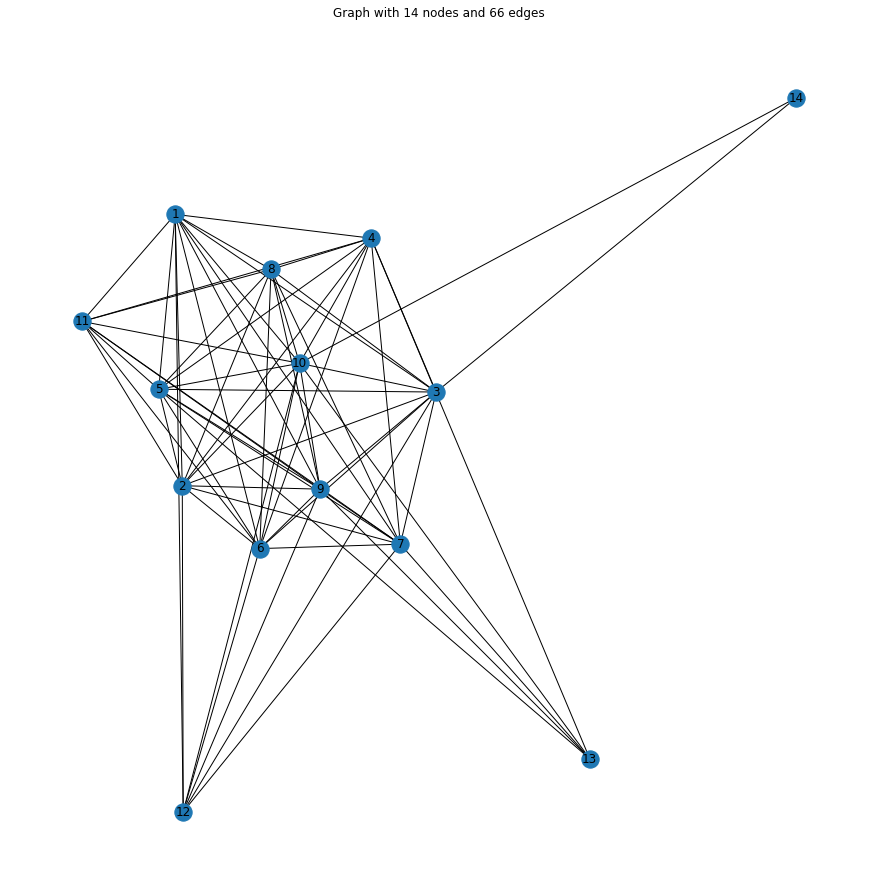

In [20]:
plt.figure(3,figsize=(12,12)) 
nx.draw(g, with_labels=True)
plt.title(str(g))
plt.show()

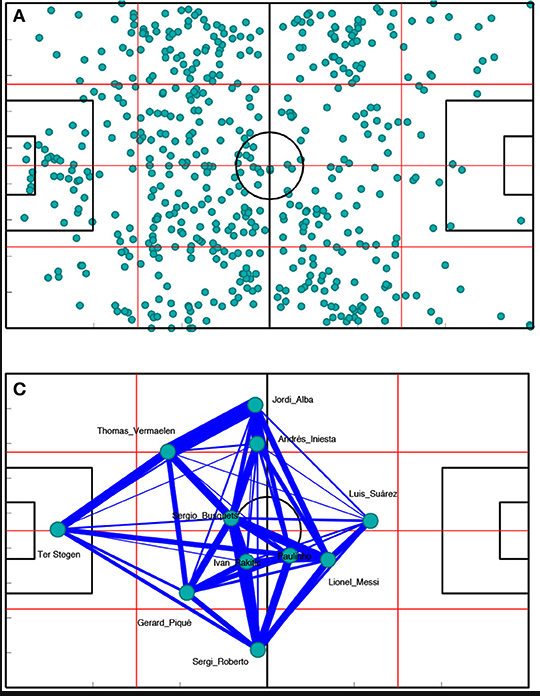

In [21]:
from PIL import Image
myImageB = Image.open("BarcaPasses.png");
display(myImageB)

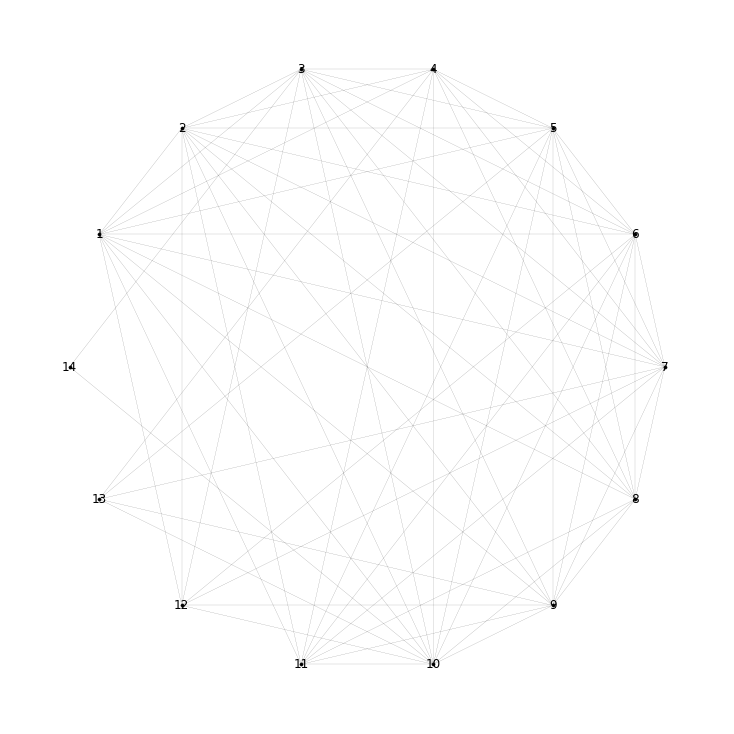

In [22]:
plt.figure(figsize = (10, 10))
options = {
    "node_color": "black",
    "node_size": 10,
    "linewidths": 0.5,
    "width": 0.1,
}
nx.draw_shell(g, with_labels = True, **options)

In [23]:
# Let us quickly look at the degree of the nodes
for i in g.degree():
    print(i)

(14, 2)
(13, 5)
(12, 7)
(11, 9)
(10, 12)
(9, 11)
(8, 10)
(7, 11)
(6, 11)
(5, 11)
(4, 10)
(3, 11)
(2, 11)
(1, 11)


#### Graph for Real Madrid

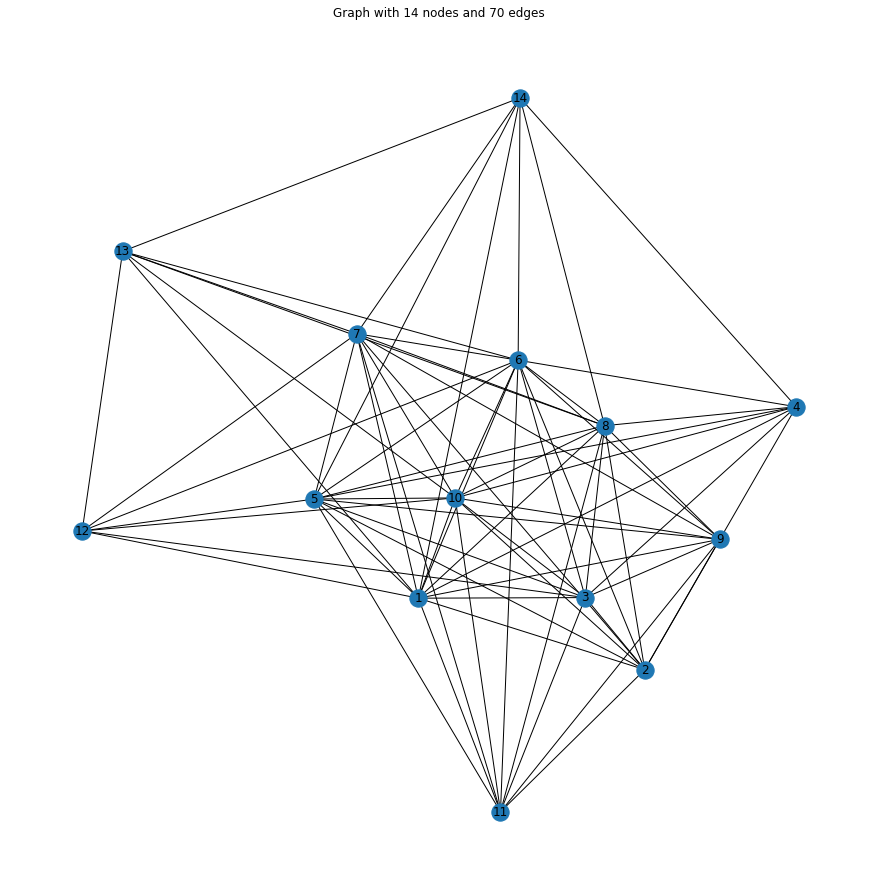

In [24]:
plt.figure(3,figsize=(12,12)) 
nx.draw(h, with_labels=True)
plt.title(str(h))
plt.show()

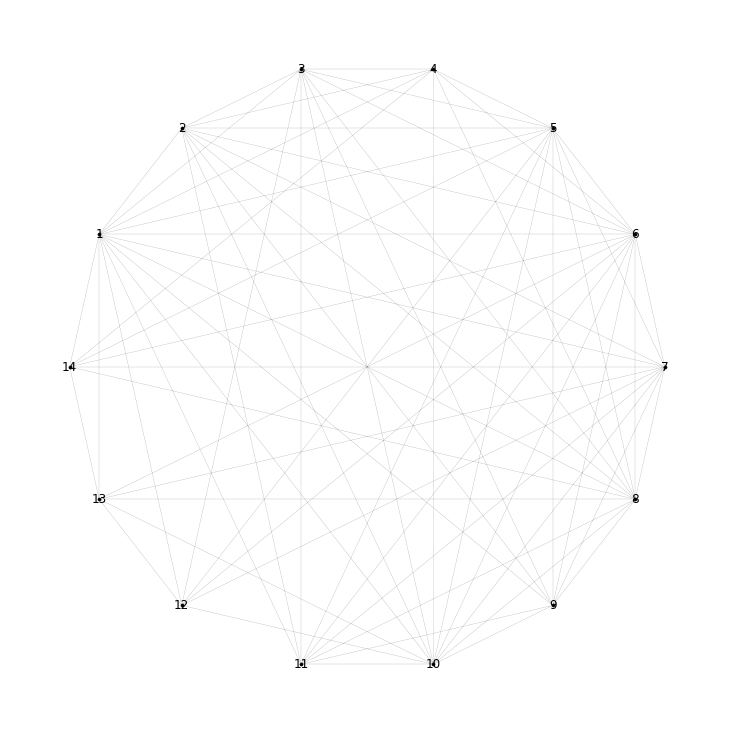

In [25]:
plt.figure(figsize = (10, 10))
options = {
    "node_color": "black",
    "node_size": 10,
    "linewidths": 0.5,
    "width": 0.1,
}
nx.draw_shell(h, with_labels = True, **options)

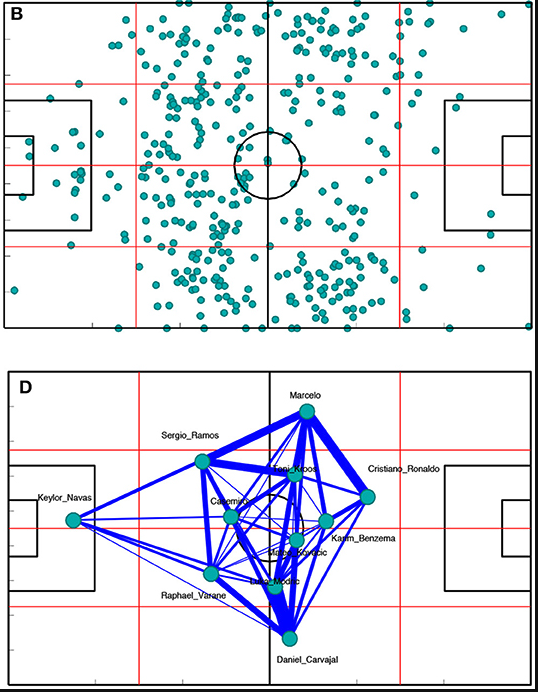

In [26]:
from PIL import Image
myImageR = Image.open("RealPasses.png");
display(myImageR)

In [27]:
# Let us quickly look at the degree of the nodes
for i in h.degree():
    print(i)

(14, 7)
(13, 7)
(12, 7)
(11, 9)
(10, 12)
(9, 9)
(8, 12)
(7, 11)
(6, 13)
(5, 12)
(4, 8)
(3, 10)
(2, 10)
(1, 13)


## 5. Centrality Measures

In [28]:
# Degree centralities for each nodes for a graph in a dictionary

deg_cen = nx.degree_centrality(g)
deg_cen_h = nx.degree_centrality(h)
# Eigen Vector Centrality

#eig_cen = nx.eigenvector_centrality(g)

#eig_cen_h = nx.eigenvector_centrality(h)
# Betweenness Centrality

betw_cen = nx.betweenness_centrality(g)
betw_cen_h = nx.betweenness_centrality(h)
# Closeness Centrality

clo_cen = nx.closeness_centrality(g)
clo_cen_h = nx.closeness_centrality(h)

### 5.1 Degree Centrality

#### **a. Degree Centrality for FC Barcelone**

In [29]:
keys = []
values = []

for key, value in deg_cen.items():
    keys.append(key)
    values.append(value)

dc_data_barca = pd.DataFrame({'Players': keys, 'degree_centrality': values}).sort_values('degree_centrality', ascending=False)
px.bar(data_frame=dc_data_barca, x='Players', y='degree_centrality', template='plotly_dark')

In [30]:
temp = {}

for w in sorted(deg_cen, key = deg_cen.get, reverse = True):
    temp[w] = deg_cen[w]

print("Sorted Importance of nodes in terms of deg_cen for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

print()

Sorted Importance of nodes in terms of deg_cen for Phase 15 is [10, 9, 7, 6, 5]



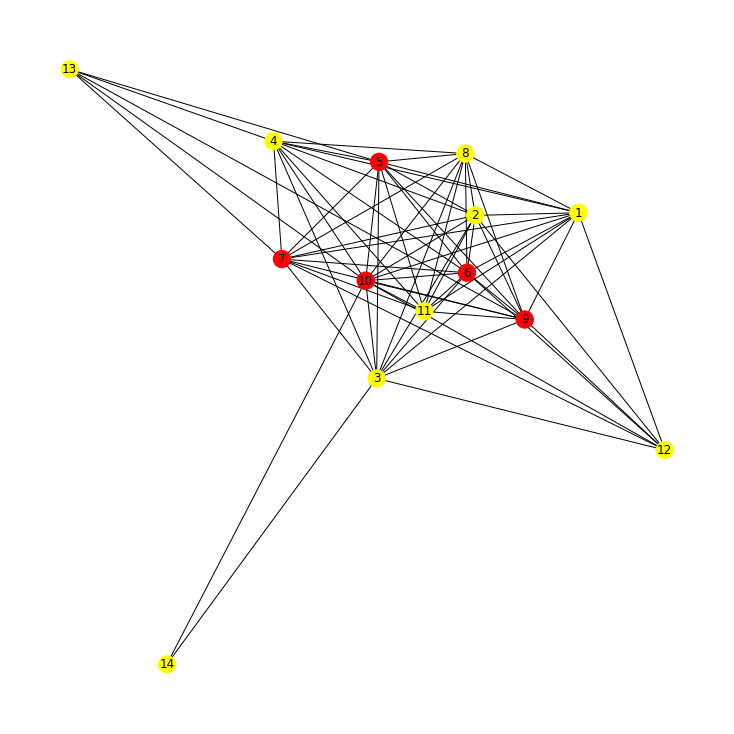

In [31]:
# Let us color these nodes and visualize the network again

color = []

for node in g:
    
    if (node == 10 or node == 9 or node == 7 or node==6 or node==5):
        color.append('red')
    
    else:
        color.append('yellow')

plt.figure(figsize = (10, 10))

nx.draw(g, node_color = color, with_labels = True)

#### **b. Degree Centrality for Real Madrid**

In [32]:
keys = []
values = []

for key, value in deg_cen_h.items():
    keys.append(key)
    values.append(value)

dc_data_Real = pd.DataFrame({'Players': keys, 'degree_centrality': values}).sort_values('degree_centrality', ascending=False)
px.bar(data_frame=dc_data_Real, x='Players', y='degree_centrality', template='plotly_dark')

In [33]:
temp = {}

for w in sorted(deg_cen_h, key = deg_cen_h.get, reverse = True):
    temp[w] = deg_cen_h[w]

print("Sorted Importance of nodes in terms of deg_cen_h for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

print()

Sorted Importance of nodes in terms of deg_cen_h for Phase 13 is [6, 1, 10, 8, 5]



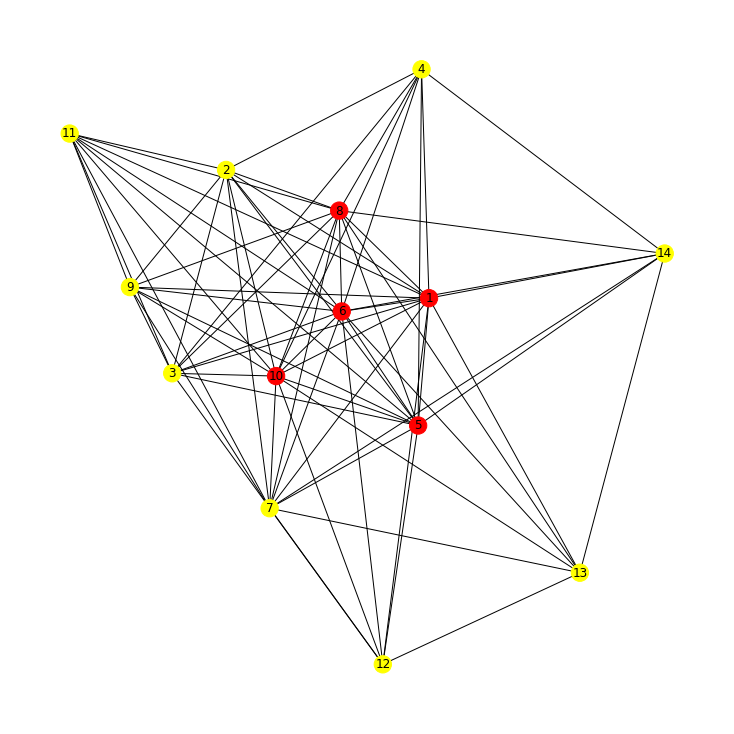

In [34]:
# Let us color these nodes and visualize the network again

color = []

for node in h:
    
    if (node == 6 or node == 1 or node == 10 or node==8 or node==5):
        color.append('red')
    
    else:
        color.append('yellow')

plt.figure(figsize = (10, 10))

nx.draw(h, node_color = color, with_labels = True)

### **5.2. Betweenness Centrality**

 #### **a. Betweenness Centrality for FC Barcelona**

In [35]:
keys = []
values = []

for key, value in betw_cen.items():
    keys.append(key)
    values.append(value)

dc_data_barca = pd.DataFrame({'Players': keys, 'betweenness_centrality': values}).sort_values('betweenness_centrality', ascending=False)
px.bar(data_frame=dc_data_barca, x='Players', y='betweenness_centrality', template='plotly_dark')

In [36]:
temp = {}

for w in sorted(betw_cen, key = betw_cen.get, reverse = True):
    temp[w] = betw_cen[w]

print("Sorted Importance of nodes in terms of betw_cen for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

print()

Sorted Importance of nodes in terms of betw_cen for Phase 15 is [10, 3, 7, 9, 5]



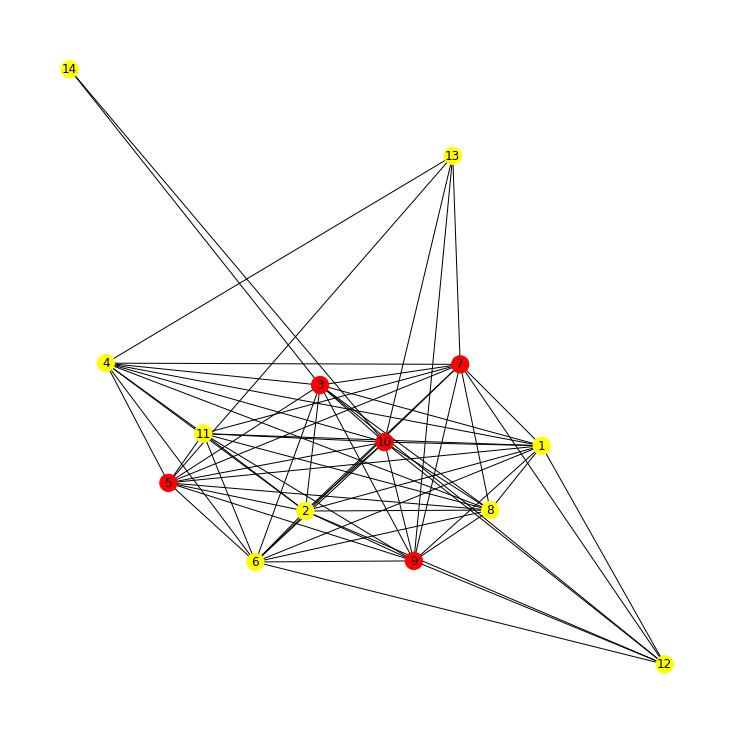

In [37]:
# Let us color these nodes and visualize the network again

color = []

for node in g:
    
    if (node == 10 or node == 3 or node == 7 or node==9 or node==5):
        color.append('red')
    
    else:
        color.append('yellow')

plt.figure(figsize = (10, 10))

nx.draw(g, node_color = color, with_labels = True)

 #### **b. Betweenness Centrality for Real Madrid**

In [38]:
keys = []
values = []

for key, value in betw_cen_h.items():
    keys.append(key)
    values.append(value)

dc_data_Real = pd.DataFrame({'Players': keys, 'betweenness_centrality': values}).sort_values('betweenness_centrality', ascending=False)
px.bar(data_frame=dc_data_Real, x='Players', y='betweenness_centrality', template='plotly_dark')

In [39]:
temp = {}

for w in sorted(betw_cen_h, key = betw_cen_h.get, reverse = True):
    temp[w] = betw_cen_h[w]

print("Sorted Importance of nodes in terms of betw_cen_h for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

print()

Sorted Importance of nodes in terms of betw_cen_h for Phase 10 is [6, 1, 8, 10, 5]



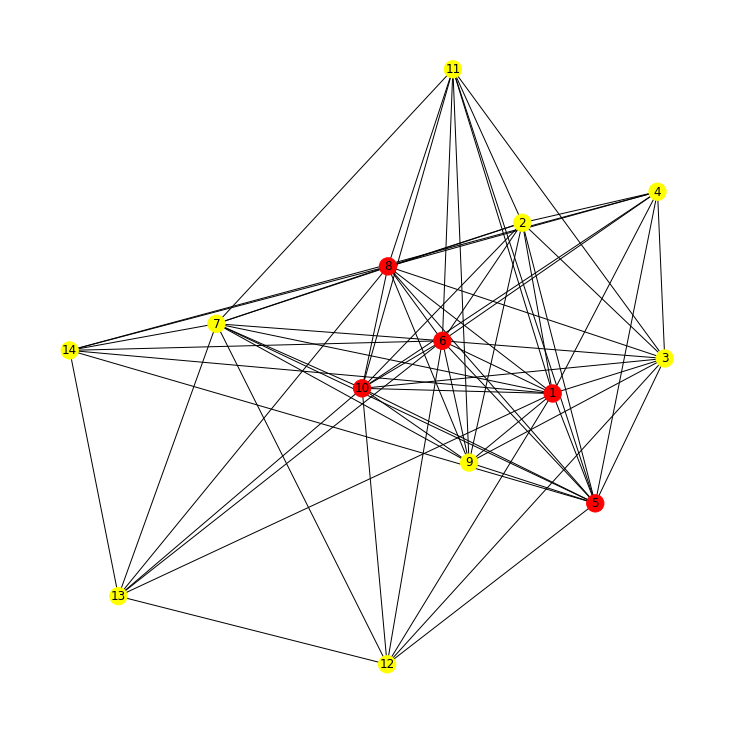

In [40]:
# Let us color these nodes and visualize the network again

color = []

for node in h:
    
    if (node == 6 or node == 1 or node == 8 or node==10 or node==5):
        color.append('red')
    
    else:
        color.append('yellow')

plt.figure(figsize = (10, 10))

nx.draw(h, node_color = color, with_labels = True)

### **5.3 Closeness Centrality**

 #### **a. Closeness Centrality for FC Barcelona**

In [41]:
keys = []
values = []

for key, value in clo_cen.items():
    keys.append(key)
    values.append(value)

dc_data_barca = pd.DataFrame({'Players': keys, 'closeness_centrality': values}).sort_values('closeness_centrality', ascending=False)
px.bar(data_frame=dc_data_barca, x='Players', y='closeness_centrality', template='plotly_dark')

In [42]:
temp = {}

for w in sorted(clo_cen, key = clo_cen.get, reverse = True):
    temp[w] = clo_cen[w]

print("Sorted Importance of nodes in terms of clo_cen for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

print()

Sorted Importance of nodes in terms of clo_cen for Phase 15 is [10, 9, 7, 6, 5]



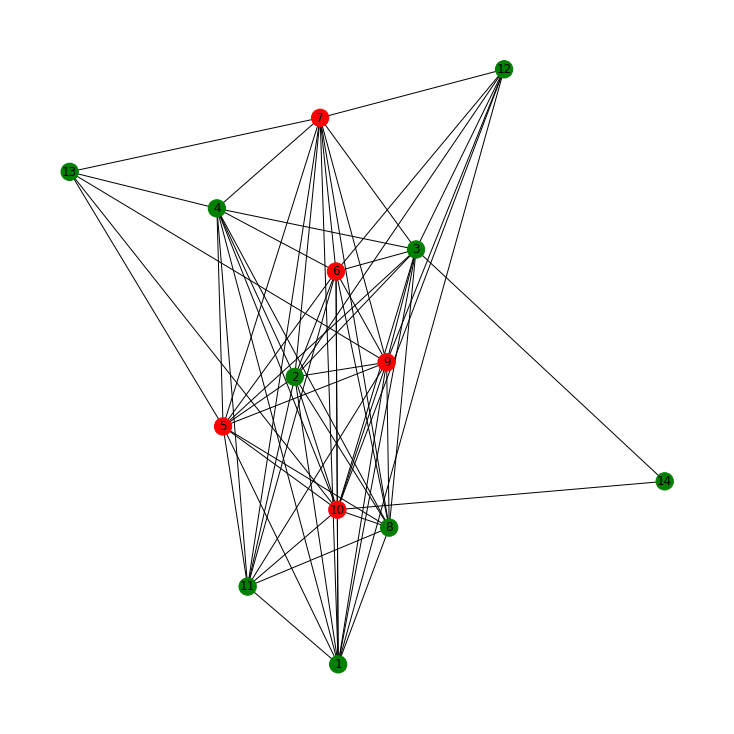

In [43]:
# Let us color these nodes and visualize the network again

color = []

for node in g:
    
    if (node == 10 or node == 9 or node == 7 or node==6 or node==5):
        color.append('red')
    
    else:
        color.append('green')

plt.figure(figsize = (10, 10))

nx.draw(g, node_color = color, with_labels = True)

 #### **b. Closeness Centrality for Real Madrid**

In [44]:
keys = []
values = []

for key, value in clo_cen_h.items():
    keys.append(key)
    values.append(value)

dc_data_Real = pd.DataFrame({'Players': keys, 'closeness_centrality': values}).sort_values('closeness_centrality', ascending=False)
px.bar(data_frame=dc_data_Real, x='Players', y='closeness_centrality', template='plotly_dark')

In [45]:
temp = {}

for w in sorted(clo_cen_h, key = clo_cen_h.get, reverse = True):
    temp[w] = clo_cen_h[w]

print("Sorted Importance of nodes in terms of clo_cen_h for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

print()

Sorted Importance of nodes in terms of clo_cen_h for Phase 13 is [6, 1, 10, 8, 5]



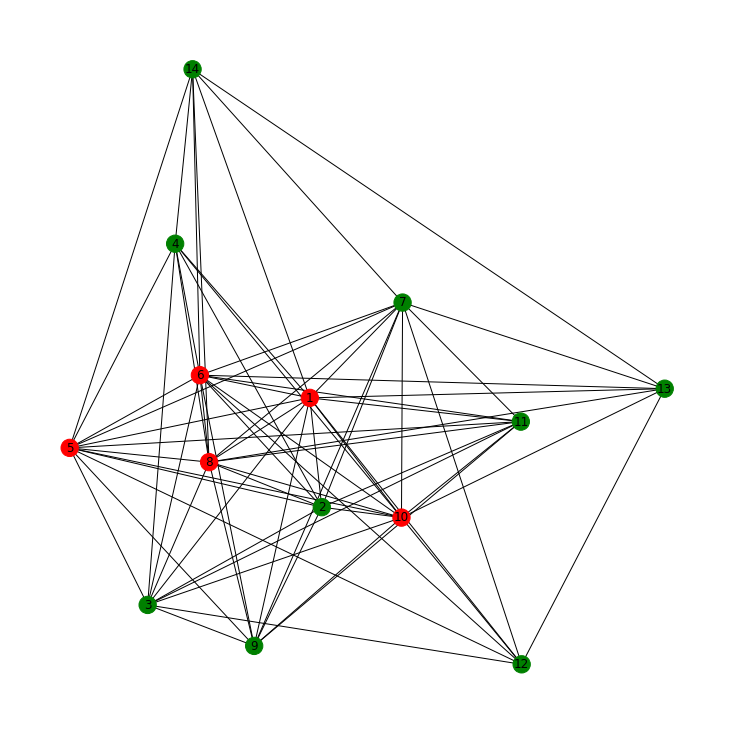

In [46]:
# Let us color these nodes and visualize the network again

color = []

for node in h:
    
    if (node == 6 or node == 1 or node == 10 or node==8 or node==5):
        color.append('red')
    
    else:
        color.append('green')

plt.figure(figsize = (10, 10))

nx.draw(h, node_color = color, with_labels = True)

## **Conclusion**

- We figured out the connections in both the Barcelona Team and the Real Madrid Team during a classico game, by visualizing the network.
- We also found various centrality measures and figured out the important nodes for each centrality measure on each team. The importance of these nodes can be further explained by the definitions of the centralities they correspond to.
- We also identified the Best player for each team  i.e., Node 10 for Barcelona which corresponds to Lionel Messi, and Node 6 (i.e. 6+14=20) for Real Madrid which corresponds to Christiano Ronaldo.  
- We could figure out that Leonel Messi was way to much influencial for the barcelona Team than Marcelo was for the Real Madrid. 
- The Real Madrid Defender central back Raphael Varane was by far the second most important player for his team, suggesting that either Barcelona was very offensive, or Real Madrid tactics was starting from the back with the defense.
- According to the centrality measures, Ronaldo was not among the 5 most influencial players for his team Real Madrid on this classico game.